#STEP 1 

#A)
LET US DOWNLOAD THE DATASET

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
!wget -P data https://archive.ics.uci.edu/ml/machine-learning-databases/00294/CCPP.zip

--2021-03-01 08:48:00--  https://archive.ics.uci.edu/ml/machine-learning-databases/00294/CCPP.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3674852 (3.5M) [application/x-httpd-php]
Saving to: ‘data/CCPP.zip’

CCPP.zip            100%[===================>]   3.50M  2.94MB/s    in 1.2s    

2021-03-01 08:48:01 (2.94 MB/s) - ‘data/CCPP.zip’ saved [3674852/3674852]



In [ ]:
!pwd

/content/data/CCPP


In [ ]:
!unzip CCPP.zip

Archive:  CCPP.zip
   creating: CCPP/
  inflating: CCPP/Folds5x2_pp.ods    
  inflating: CCPP/Folds5x2_pp.xlsx   
  inflating: CCPP/Readme.txt         
  inflating: CCPP/Readme.txt~        


#B)
LET US LOAD THE DATASET USING PANDAS

In [ ]:
cd CCPP

[Errno 2] No such file or directory: 'CCPP'
/content/data/CCPP


In [ ]:
data = pd.read_excel('Folds.xlsx')
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [ ]:
#data = pd.read_excel('drive/MyDrive/Fold.xlsx')

In [ ]:
data.shape

(9568, 5)

#preprocing the data


In [ ]:
data.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,9568.0,19.651231,7.452473,1.81,13.5100,20.345,25.72,37.11
V,9568.0,54.305804,12.707893,25.36,41.7400,52.080,66.54,81.56
AP,9568.0,1013.259078,5.938784,992.89,1009.1000,1012.940,1017.26,1033.30
RH,9568.0,73.308978,14.600269,25.56,63.3275,74.975,84.83,100.16
PE,9568.0,454.365009,17.066995,420.26,439.7500,451.550,468.43,495.76


In [ ]:
data.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


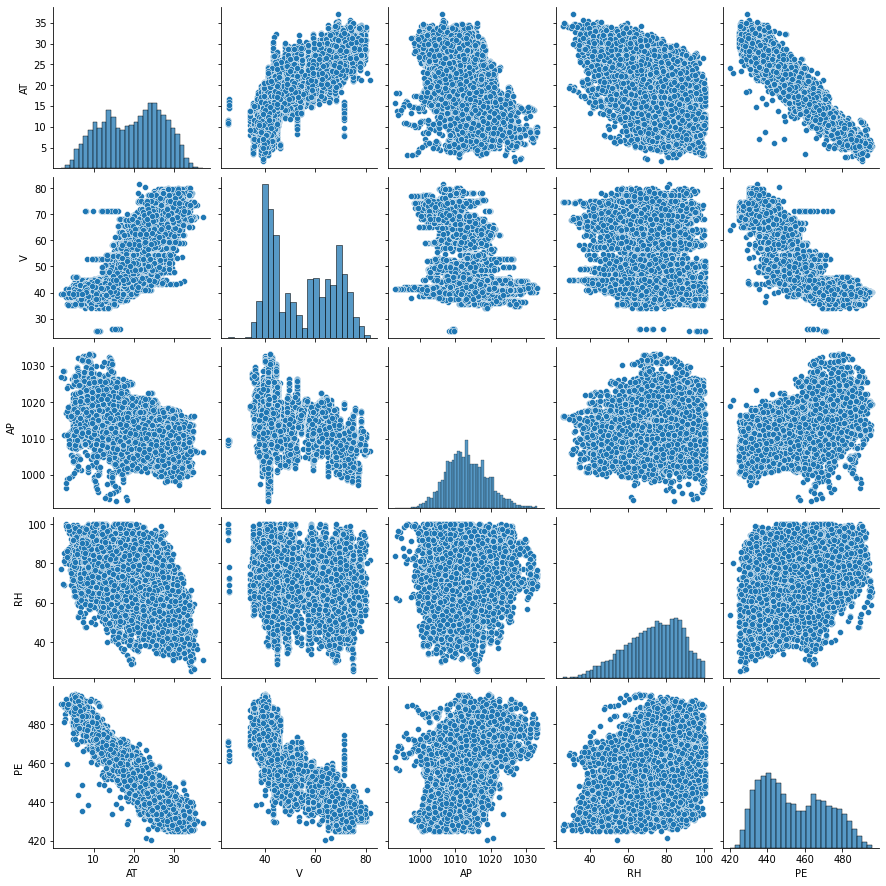

In [ ]:
import seaborn as sb
sb.pairplot(data)

Loking the matrix of corelation we see that PE is more correlate with AT. So AT is an important variable. Let us perform pandas profiling and try to see more detail for the prepocessing.

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

     - 38.6MB 618kB/s
     |████████████████████████████████| 81kB 4.8MB/s 
     |████████████████████████████████| 604kB 16.0MB/s 
     |████████████████████████████████| 3.1MB 19.3MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 81kB 10.0MB/s 
     |████████████████████████████████| 296kB 54.3MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.11.0-py2.py3-none-any.whl size=243678 sha256=6642e90d9d98b63790d5b29c4e1eccb2b87e98aa6708b4bfe40a90e94932a372
  Stored in directory: /tmp/pip-ephem-wheel-cache-3m1bjazv/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=10d87338f0989b0f9837f42afdd2af57884dfc152648d27ff7eba1b708d8ab29
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.1-cp37-none-any.whl size=599822 sha256=

In [ ]:
from pandas_profiling import profile_report
data_report = data.profile_report()
#data_report.to_file('data.html')
data_report

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Pandas profiling show that we have high correlation with AT. And we have some duplicate rows. 

#C) LET US CREAT A CLASS FOR LOADING AND SPLITING OUR DATA

In [ ]:

import pandas as pd
class Dataloader():
  def __init__(self, data=None):
        self.data = data
  def read_data(self,path):
      data=pd.read_excel(path)
      #X=data.drop('PE',axis=1)
      #Y=data['PE']
      return data
  def split_data(self,df, split_percent=0.2):
      index = np.random.RandomState(seed=4).permutation(df.shape[0])
      n = int(split_percent*df.shape[0]) # r=>range of the split
      X_train = df.iloc[index[:n],:-1]
      X_test = df.iloc[index[n:],:-1]
      Y_train = df.iloc[index[:n],-1]
      Y_test = df.iloc[index[n:],-1]
   
      return X_train.to_numpy(), X_test.to_numpy(), Y_train.to_numpy(), Y_test.to_numpy()

In [ ]:
Data=Dataloader()
path='Folds.xlsx'
data=Data.read_data(path)
data.head(1)


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26


#Let us normalize our data

In [ ]:
# data = (data-data.mean())/data.std()
X_train, X_test, Y_train, Y_test = Data.split_data(data)
# normalize features
X_train = (X_train - X_train.min()) / (X_train.max()-X_train.min())
X_test = (X_test - X_test.min()) / (X_test.max()-X_test.min())


In [ ]:
X_train

array([[0.00493022, 0.03922825, 0.98697568, 0.08020342],
       [0.00831732, 0.03672432, 0.97393195, 0.09226693],
       [0.01751781, 0.06438401, 0.96971991, 0.07293426],
       ...,
       [0.0028242 , 0.03752984, 0.98817912, 0.08103806],
       [0.02673771, 0.06780993, 0.97467924, 0.06094839],
       [0.02514606, 0.06502455, 0.97727052, 0.05765834]])

In [ ]:
Y_train

array([484.42, 475.14, 442.82, ..., 490.83, 425.71, 437.52])

In [ ]:
 X_test

array([[0.0168785 , 0.06131906, 0.98230715, 0.07822664],
       [0.02498328, 0.06269571, 0.97238946, 0.04791127],
       [0.02540015, 0.06919117, 0.97959263, 0.070975  ],
       ...,
       [0.0234709 , 0.06798903, 0.97681025, 0.06040776],
       [0.02061096, 0.0665639 , 0.97609284, 0.07907008],
       [0.00799814, 0.04014581, 0.98138615, 0.08132895]])

In [ ]:
Y_test

array([446.98, 435.34, 431.02, ..., 435.21, 439.04, 473.  ])

#STEP2
in this step we will We will be creating Linear Regression models using gradient descent, SGD and minibatch
GD.

In [ ]:
def cost_function(X, Y, theta):
  
    N = len(Y)
    predictions = X.dot(theta)
    cost_value = (np.sum(np.square(predictions - Y)))*(1/N)
    return cost_value # 

In [ ]:
def gradient_descent(X, Y, theta, alpha, max_iter):
  #m, d = X.shape
  costs = []
  m = len(Y)
  print('x: ', X)
  print('y: ', Y)
  for i in range(max_iter):
    
  #print(iteration)
  # Hypothesis Values
    h = X.dot(theta)
  
# Difference b/w Hypothesis and Actual Y
    loss = h - Y
    #print('loss: ', loss)
# Gradient Calculation
    gradient = X.T.dot(loss) / m
  
# Changing Values of B using Gradient
    theta = theta - alpha * gradient
# New Cost Value
    cost = cost_function(X, Y, theta)
    costs.append(cost)
  #print ('iteration : ', i, ' loss : ', costs[-1])
  print('Print thetas ', theta)
    
  return theta, costs
  


In [ ]:
# Initial Coefficients
theta = np.zeros(X_train.shape[1])
alpha = 0.005
max_iter = 1000

theta,costs = gradient_descent(X_train, Y_train, theta, alpha, max_iter)


x:  [[0.00493022 0.03922825 0.98697568 0.08020342]
 [0.00831732 0.03672432 0.97393195 0.09226693]
 [0.01751781 0.06438401 0.96971991 0.07293426]
 ...
 [0.0028242  0.03752984 0.98817912 0.08103806]
 [0.02673771 0.06780993 0.97467924 0.06094839]
 [0.02514606 0.06502455 0.97727052 0.05765834]]
y:  [484.42 475.14 442.82 ... 490.83 425.71 437.52]
Print thetas  [  7.03695357  22.27812228 456.49125277  32.47713535]


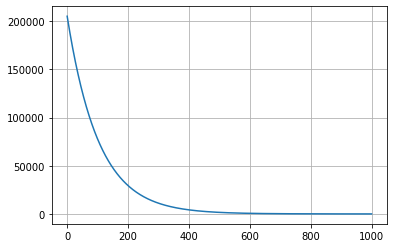

In [ ]:
import matplotlib.pyplot as plt
plt.plot(costs)
plt.grid()

In [ ]:
MSE=cost_function(X_test,Y_test,theta)
MSE

266.287855337361

In [ ]:
# Perform Stochastic Gradient Descent
def Stochastic_gradient_descent(X, Y, theta, alpha, max_iter):

  costs = []
  m = len(Y)
  print('x: ', X)
  print('y: ', Y)
  
  for i in range(max_iter):
    
    j=np.random.choice(range(m))
      
  #print(iteration)
  # Hypothesis Values
    h = X[j].dot(theta)

  # Difference b/w Hypothesis and Actual Y
    loss = h - Y[j]
      # Gradient Calculation

    gradient = (2*X[j].T.dot(loss))/m

  # Changing Values of B using Gradient
    theta = theta - alpha * gradient
  # New Cost Value
    cost = cost_function(X, Y, theta)
    costs.append(cost)
      
    
  print('Print thetas :', theta)
  return theta, costs

In [ ]:
theta = np.zeros(X_train.shape[1])
alpha = 0.9
max_iter = 4000
theta,costs = Stochastic_gradient_descent(X_train, Y_train, theta, alpha, max_iter)



x:  [[0.00493022 0.03922825 0.98697568 0.08020342]
 [0.00831732 0.03672432 0.97393195 0.09226693]
 [0.01751781 0.06438401 0.96971991 0.07293426]
 ...
 [0.0028242  0.03752984 0.98817912 0.08103806]
 [0.02673771 0.06780993 0.97467924 0.06094839]
 [0.02514606 0.06502455 0.97727052 0.05765834]]
y:  [484.42 475.14 442.82 ... 490.83 425.71 437.52]
Print thetas : [  6.99632833  22.02336797 448.46619539  31.80176387]


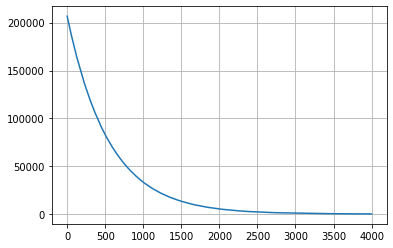

In [ ]:
plt.plot(costs)
plt.grid()

In [ ]:
MSE=cost_function(X_test,Y_test,theta)
MSE

379.94081438048664

In [ ]:
def Minibatch_gradient_descent(X, Y, theta, alpha,batch_size, max_iter):
#m, d = X.shape
  costs = []
  m = len(Y)
  print('x: ', X)
  print('y: ', Y)
  
  for i in range(max_iter):
    #if i %100 == 0: print(i)
    for j in range(0, X.shape[0], batch_size):
#print(iteration)
# Hypothesis Values
      h = X[j].dot(theta)

# Difference b/w Hypothesis and Actual Y
      loss = h - Y[j]
      #print('loss: ', loss)
# Gradient Calculation

      gradient = X[j].T.dot(loss)/batch_size

# Changing Values of B using Gradient
      theta = theta - alpha * gradient
# New Cost Value
    cost = cost_function(X, Y, theta)
    costs.append(cost)
  print('Print thetas :', theta)   
  
  return theta, costs
  

In [ ]:
theta = np.zeros(X_train.shape[1])
alpha = 0.003
max_iter = 1000
batch_size=32
theta,costs = Minibatch_gradient_descent(X_train, Y_train, theta, alpha,batch_size, max_iter)



x:  [[0.00493022 0.03922825 0.98697568 0.08020342]
 [0.00831732 0.03672432 0.97393195 0.09226693]
 [0.01751781 0.06438401 0.96971991 0.07293426]
 ...
 [0.0028242  0.03752984 0.98817912 0.08103806]
 [0.02673771 0.06780993 0.97467924 0.06094839]
 [0.02514606 0.06502455 0.97727052 0.05765834]]
y:  [484.42 475.14 442.82 ... 490.83 425.71 437.52]
Print thetas : [  6.68109971  21.78237465 460.45155191  32.36992197]


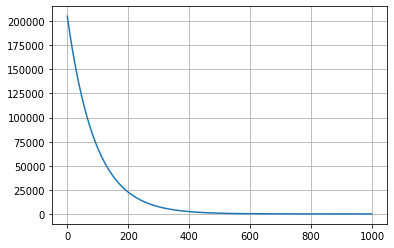

In [ ]:
plt.plot(costs)
plt.grid()

In [ ]:
MSE=cost_function(X_test,Y_test,theta)
MSE

256.2265274236295

#STEP 3
Here we will write our base models, we can now test the effects of different hyperparameters and regularization on the model.

In [ ]:
def cost_function_l1(X, Y, theta, lmda):
  
    N = len(Y)
    predictions = X.dot(theta) 
    value = (np.sum(np.square(predictions - Y)))*(1/N) + lmda * np.sum(np.abs(theta))
    
    return value # 

In [ ]:
def cost_function_l2(X, Y, theta, lmda):
  
    N = len(Y)
    predictions = X.dot(theta) 
    value = (np.sum(np.square(predictions - Y)))*(1/N) + lmda * np.sum(theta**2)
    
    return value # 

In [ ]:
def cost_function_l1_l2(X, Y, theta, lmda):
  
    N = len(Y)
    predictions = X.dot(theta) 
    value = (np.sum(np.square(predictions - Y)))*(1/N) + lmda * np.sum(np.abs(theta)) + lmda * np.sum(theta**2)
    
    return value # 

In [ ]:
def gradient_descent_L1_regularizer(X, Y, theta, alpha, max_iter,lmda):
  #m, d = X.shape
  costs = []
  m = len(Y)
  print('x: ', X)
  print('y: ', Y)
  for i in range(max_iter):
    
#print(iteration)
# Hypothesis Values
    h = X.dot(theta)
    
# Difference b/w Hypothesis and Actual Y
    loss = h - Y
    
# Gradient Calculation
    gradient = (2*X.T.dot(loss)) / m +  lmda*np.sign(theta)
    
# Changing Values of B using Gradient
    theta = theta - alpha * gradient
# New Cost Value
    cost = cost_function_l1(X, Y, theta, lmda)
    costs.append(cost)
    #print ('iteration : ', i, ' loss : ', costs[-1]) 
  print('Print thetas ', theta)
  return theta, costs

In [ ]:
theta = np.zeros(X_train.shape[1])
alpha = 0.002
max_iter = 1000
lmda=0.5
theta,costs = gradient_descent_L1_regularizer(X_train, Y_train, theta, alpha, max_iter,lmda)


x:  [[0.00493022 0.03922825 0.98697568 0.08020342]
 [0.00831732 0.03672432 0.97393195 0.09226693]
 [0.01751781 0.06438401 0.96971991 0.07293426]
 ...
 [0.0028242  0.03752984 0.98817912 0.08103806]
 [0.02673771 0.06780993 0.97467924 0.06094839]
 [0.02514606 0.06502455 0.97727052 0.05765834]]
y:  [484.42 475.14 442.82 ... 490.83 425.71 437.52]
Print thetas  [  6.06053714  21.19372379 450.45190804  31.04841598]


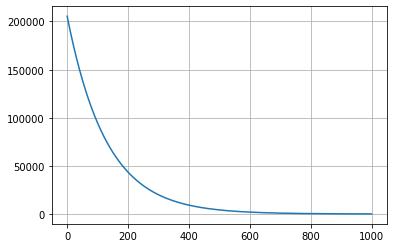

In [ ]:
plt.plot(costs)
plt.grid()

In [ ]:
MSE=cost_function_l1(X_test,Y_test,theta,lmda)
MSE

596.4454269821144

In [ ]:
theta = np.zeros(X_train.shape[1])
alpha = 0.001
max_iter = 1000


#Here we write a function for the norm of the weight of L1 regularization of gradient descent. And we do his plot. 

In [ ]:
norms = []
for lmda in range(-10, 11):
  theta,_ = gradient_descent_L1_regularizer(X_train, Y_train, theta, alpha, max_iter,lmda)
  norms.append(np.linalg.norm(theta))
  

x:  [[0.00493022 0.03922825 0.98697568 0.08020342]
 [0.00831732 0.03672432 0.97393195 0.09226693]
 [0.01751781 0.06438401 0.96971991 0.07293426]
 ...
 [0.0028242  0.03752984 0.98817912 0.08103806]
 [0.02673771 0.06780993 0.97467924 0.06094839]
 [0.02514606 0.06502455 0.97727052 0.05765834]]
y:  [484.42 475.14 442.82 ... 490.83 425.71 437.52]
Print thetas  [ 16.204079    29.29079094 397.70096597  37.40332965]
x:  [[0.00493022 0.03922825 0.98697568 0.08020342]
 [0.00831732 0.03672432 0.97393195 0.09226693]
 [0.01751781 0.06438401 0.96971991 0.07293426]
 ...
 [0.0028242  0.03752984 0.98817912 0.08103806]
 [0.02673771 0.06780993 0.97467924 0.06094839]
 [0.02514606 0.06502455 0.97727052 0.05765834]]
y:  [484.42 475.14 442.82 ... 490.83 425.71 437.52]
Print thetas  [ 25.76281822  40.30870366 453.33012851  49.83074868]
x:  [[0.00493022 0.03922825 0.98697568 0.08020342]
 [0.00831732 0.03672432 0.97393195 0.09226693]
 [0.01751781 0.06438401 0.96971991 0.07293426]
 ...
 [0.0028242  0.03752984 0.

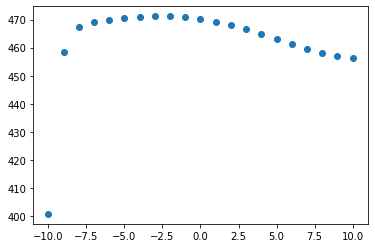

In [ ]:
plt.scatter(range(-10,11),norms)

In [ ]:
def gradient_descent_L2_regularizer(X, Y, theta, alpha, max_iter,lmda):
  #m, d = X.shape
  costs = []
  m = len(Y)
  print('x: ', X)
  print('y: ', Y)
  for i in range(max_iter):
    
#print(iteration)
# Hypothesis Values
    h = X.dot(theta)
    
# Difference b/w Hypothesis and Actual Y
    loss = h - Y
    
# Gradient Calculation
    gradient = ((2*X.T.dot(loss)) / m) +  (2*lmda* theta)
    
# Changing Values of B using Gradient
    theta = theta - alpha * gradient
# New Cost Value
    cost = cost_function_l2(X, Y, theta, lmda)
    costs.append(cost)
    #print ('iteration : ', i, ' loss : ', costs[-1]) 
  print('Print thetas ', theta)
  return theta, costs

In [ ]:
theta = np.zeros(X_train.shape[1])
alpha = 0.002
max_iter = 1000
lmda=0.00001
theta,costs = gradient_descent_L2_regularizer(X_train, Y_train, theta, alpha, max_iter,lmda)


x:  [[0.00493022 0.03922825 0.98697568 0.08020342]
 [0.00831732 0.03672432 0.97393195 0.09226693]
 [0.01751781 0.06438401 0.96971991 0.07293426]
 ...
 [0.0028242  0.03752984 0.98817912 0.08103806]
 [0.02673771 0.06780993 0.97467924 0.06094839]
 [0.02514606 0.06502455 0.97727052 0.05765834]]
y:  [484.42 475.14 442.82 ... 490.83 425.71 437.52]
Print thetas  [  7.04535801  22.14948682 450.60407891  31.98769351]


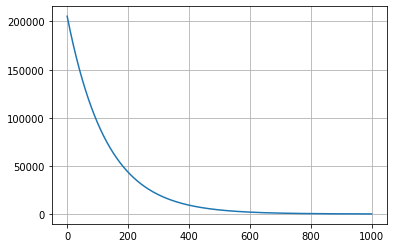

In [ ]:
plt.plot(costs)
plt.grid()

In [ ]:
MSE=cost_function_l2(X_test,Y_test,theta,lmda)
MSE

339.37606192017165

#Here we write a function for the norm of the weight of L2 regularization of gradient descent. And we do his plot.

In [ ]:
theta = np.zeros(X_train.shape[1])
alpha = 0.001
max_iter = 1000

In [ ]:
norms = []
for lmda in range(-10, 11):
  theta,_ = gradient_descent_L2_regularizer(X_train, Y_train, theta, alpha, max_iter,lmda)
  norms.append(np.linalg.norm(theta))
  

x:  [[0.00493022 0.03922825 0.98697568 0.08020342]
 [0.00831732 0.03672432 0.97393195 0.09226693]
 [0.01751781 0.06438401 0.96971991 0.07293426]
 ...
 [0.0028242  0.03752984 0.98817912 0.08103806]
 [0.02673771 0.06780993 0.97467924 0.06094839]
 [0.02514606 0.06502455 0.97727052 0.05765834]]
y:  [484.42 475.14 442.82 ... 490.83 425.71 437.52]
Print thetas  [4.44086928e+07 1.41870207e+08 2.93376543e+09 2.09304796e+08]
x:  [[0.00493022 0.03922825 0.98697568 0.08020342]
 [0.00831732 0.03672432 0.97393195 0.09226693]
 [0.01751781 0.06438401 0.96971991 0.07293426]
 ...
 [0.0028242  0.03752984 0.98817912 0.08103806]
 [0.02673771 0.06780993 0.97467924 0.06094839]
 [0.02514606 0.06502455 0.97727052 0.05765834]]
y:  [484.42 475.14 442.82 ... 490.83 425.71 437.52]
Print thetas  [1.68204093e+14 8.57936217e+14 2.43952568e+16 1.88360897e+15]
x:  [[0.00493022 0.03922825 0.98697568 0.08020342]
 [0.00831732 0.03672432 0.97393195 0.09226693]
 [0.01751781 0.06438401 0.96971991 0.07293426]
 ...
 [0.002824

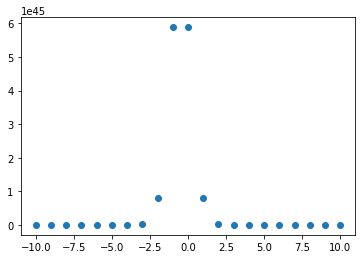

In [ ]:
plt.scatter(range(-10,11),norms)

In [ ]:
def gradient_descent_L1_L2_regularizer(X, Y, theta, alpha, max_iter,lmda):
  #m, d = X.shape
  costs = []
  m = len(Y)
  print('x: ', X)
  print('y: ', Y)
  for i in range(max_iter):
    
#print(iteration)
# Hypothesis Values
    h = X.dot(theta)
    
# Difference b/w Hypothesis and Actual Y
    loss = h - Y
    
# Gradient Calculation
    gradient = ((2*X.T.dot(loss)) / m) + (2*lmda* theta)+ lmda*np.sign(theta)
    
# Changing Values of B using Gradient
    theta = theta - alpha * gradient
# New Cost Value
    cost = cost_function_l1_l2(X, Y, theta, lmda)
    costs.append(cost)
  #
  print('Print thetas ', theta)
  return theta, costs

In [ ]:

theta = np.zeros(X_train.shape[1])
alpha = 0.003
max_iter = 1000
lmda=0.001
theta,costs = gradient_descent_L1_L2_regularizer(X_train, Y_train, theta, alpha, max_iter,lmda)


x:  [[0.00493022 0.03922825 0.98697568 0.08020342]
 [0.00831732 0.03672432 0.97393195 0.09226693]
 [0.01751781 0.06438401 0.96971991 0.07293426]
 ...
 [0.0028242  0.03752984 0.98817912 0.08103806]
 [0.02673771 0.06780993 0.97467924 0.06094839]
 [0.02514606 0.06502455 0.97727052 0.05765834]]
y:  [484.42 475.14 442.82 ... 490.83 425.71 437.52]
Print thetas  [  6.95914896  22.19798899 458.2524384   32.67228034]


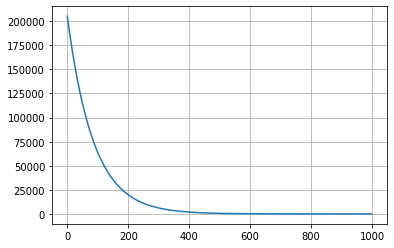

In [ ]:
plt.plot(costs)
plt.grid()

In [ ]:

MSE=cost_function_l1_l2(X_test,Y_test,theta,lmda)
MSE

470.23793457147974

#Here we write a function for the norm of the weight of the combinaison of L1 and L2 regularization of gradient descent. And we do his plot.

In [ ]:
theta = np.zeros(X_train.shape[1])
alpha = 0.001
max_iter = 1000

In [ ]:
norms = []
for lmda in range(-10, 11):
  theta,_ = gradient_descent_L1_L2_regularizer(X_train, Y_train, theta, alpha, max_iter,lmda)
  norms.append(np.linalg.norm(theta))
  

x:  [[0.00493022 0.03922825 0.98697568 0.08020342]
 [0.00831732 0.03672432 0.97393195 0.09226693]
 [0.01751781 0.06438401 0.96971991 0.07293426]
 ...
 [0.0028242  0.03752984 0.98817912 0.08103806]
 [0.02673771 0.06780993 0.97467924 0.06094839]
 [0.02514606 0.06502455 0.97727052 0.05765834]]
y:  [484.42 475.14 442.82 ... 490.83 425.71 437.52]
Print thetas  [2.36560706e+08 3.27717804e+08 2.94509274e+09 3.91570278e+08]
x:  [[0.00493022 0.03922825 0.98697568 0.08020342]
 [0.00831732 0.03672432 0.97393195 0.09226693]
 [0.01751781 0.06438401 0.96971991 0.07293426]
 ...
 [0.0028242  0.03752984 0.98817912 0.08103806]
 [0.02673771 0.06780993 0.97467924 0.06094839]
 [0.02514606 0.06502455 0.97727052 0.05765834]]
y:  [484.42 475.14 442.82 ... 490.83 425.71 437.52]
Print thetas  [1.08881639e+16 1.11638549e+16 2.32925310e+16 1.19569202e+16]
x:  [[0.00493022 0.03922825 0.98697568 0.08020342]
 [0.00831732 0.03672432 0.97393195 0.09226693]
 [0.01751781 0.06438401 0.96971991 0.07293426]
 ...
 [0.002824

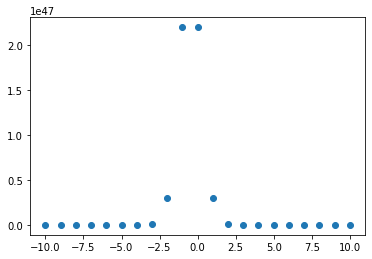

In [ ]:
plt.scatter(range(-10,11),norms)

In [ ]:
def Stochastic_gradient_descent_L1_regularizer(X, Y, theta, alpha, max_iter,lmda):

  costs = []
  m = len(Y)
  print('x: ', X)
  print('y: ', Y)
  
  for i in range(max_iter):
    
    #for j in range(0,X.shape[0]):
    j=np.random.choice(range(m)) 
  #print(iteration)
  # Hypothesis Values
    h = X[j].dot(theta)

  # Difference b/w Hypothesis and Actual Y
    loss = h - Y[j]
      # Gradient Calculation

    gradient = (2*X[j].T.dot(loss))/m + lmda*np.sign(theta)

  # Changing Values of B using Gradient
    theta = theta - alpha * gradient
  # New Cost Value
    cost = cost_function_l1(X, Y, theta,lmda)
    costs.append(cost)
      # if i % gap == 0 :
    #print ('iteration : ', i, ' loss : ', costs[-1])
  print('Print thetas ', theta)
  return theta, costs

In [ ]:
theta = np.zeros(X_train.shape[1])
alpha = 0.8
max_iter = 3000
lmda=0.0001
theta,costs = Stochastic_gradient_descent_L1_regularizer(X_train, Y_train, theta, alpha, max_iter,lmda)


x:  [[0.00493022 0.03922825 0.98697568 0.08020342]
 [0.00831732 0.03672432 0.97393195 0.09226693]
 [0.01751781 0.06438401 0.96971991 0.07293426]
 ...
 [0.0028242  0.03752984 0.98817912 0.08103806]
 [0.02673771 0.06780993 0.97467924 0.06094839]
 [0.02514606 0.06502455 0.97727052 0.05765834]]
y:  [484.42 475.14 442.82 ... 490.83 425.71 437.52]
Print thetas  [  6.40882642  20.57901339 419.53051262  29.53620121]


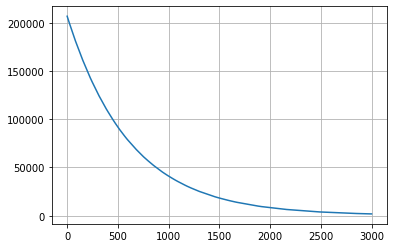

In [ ]:
plt.plot(costs)
plt.grid()

In [ ]:
MSE=cost_function_l1(X_test,Y_test,theta,lmda)
MSE

1835.450009111595

#Here we write a function for the norm of the weight of L1  regularization of Stochastic gradient descent. And we do his plot.

In [ ]:
theta = np.zeros(X_train.shape[1])
alpha = 0.001
max_iter = 1000

In [ ]:
norms = []
for lmda in range(-10, 11):
  theta,_ = Stochastic_gradient_descent_L1_regularizer(X_train, Y_train, theta, alpha, max_iter,lmda)
  norms.append(np.linalg.norm(theta))

x:  [[0.00493022 0.03922825 0.98697568 0.08020342]
 [0.00831732 0.03672432 0.97393195 0.09226693]
 [0.01751781 0.06438401 0.96971991 0.07293426]
 ...
 [0.0028242  0.03752984 0.98817912 0.08103806]
 [0.02673771 0.06780993 0.97467924 0.06094839]
 [0.02514606 0.06502455 0.97727052 0.05765834]]
y:  [484.42 475.14 442.82 ... 490.83 425.71 437.52]
Print thetas  [ 9.99749257 10.01296603 10.45106512 10.02232997]
x:  [[0.00493022 0.03922825 0.98697568 0.08020342]
 [0.00831732 0.03672432 0.97393195 0.09226693]
 [0.01751781 0.06438401 0.96971991 0.07293426]
 ...
 [0.0028242  0.03752984 0.98817912 0.08103806]
 [0.02673771 0.06780993 0.97467924 0.06094839]
 [0.02514606 0.06502455 0.97727052 0.05765834]]
y:  [484.42 475.14 442.82 ... 490.83 425.71 437.52]
Print thetas  [19.00492933 19.03571795 19.8995414  19.05349263]
x:  [[0.00493022 0.03922825 0.98697568 0.08020342]
 [0.00831732 0.03672432 0.97393195 0.09226693]
 [0.01751781 0.06438401 0.96971991 0.07293426]
 ...
 [0.0028242  0.03752984 0.98817912

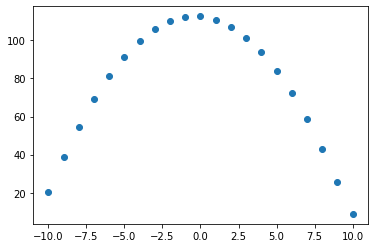

In [ ]:
plt.scatter(range(-10,11),norms)

In [ ]:
def Stochastic_gradient_descent_L2_regularizer(X, Y, theta, alpha, max_iter,lmda):

  costs = []
  m = len(Y)
  print('x: ', X)
  print('y: ', Y)
  
  for i in range(max_iter):
    
    j=np.random.choice(range(m)) 
      
  #print(iteration)
  # Hypothesis Values
    h = X[j].dot(theta)

  # Difference b/w Hypothesis and Actual Y
    loss = h - Y[j]
      # Gradient Calculation

    gradient = (2*X[j].T.dot(loss))/m + 2*lmda*(theta)

  # Changing Values of B using Gradient
    theta = theta - alpha * gradient
  # New Cost Value
    cost = cost_function_l2(X, Y, theta,lmda)
    costs.append(cost)
      # if i % gap == 0 :
    #print ('iteration : ', i, ' loss : ', costs[-1])
  print('Print thetas ', theta)
  return theta, costs

In [ ]:
theta = np.zeros(X_train.shape[1])
alpha = 0.7
max_iter = 4000
lmda=0.000001
theta,costs = Stochastic_gradient_descent_L2_regularizer(X_train, Y_train, theta, alpha, max_iter,lmda)


x:  [[0.00493022 0.03922825 0.98697568 0.08020342]
 [0.00831732 0.03672432 0.97393195 0.09226693]
 [0.01751781 0.06438401 0.96971991 0.07293426]
 ...
 [0.0028242  0.03752984 0.98817912 0.08103806]
 [0.02673771 0.06780993 0.97467924 0.06094839]
 [0.02514606 0.06502455 0.97727052 0.05765834]]
y:  [484.42 475.14 442.82 ... 490.83 425.71 437.52]
Print thetas  [  6.86014342  21.40644232 432.35867214  30.75593853]


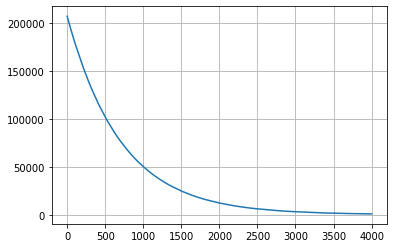

In [ ]:

plt.plot(costs)
plt.grid()


In [ ]:
MSE=cost_function_l2(X_test,Y_test,theta,lmda)
MSE

986.8455733542276

#Here we write a function for the norm of the weight of L2 regularization of Stochastic gradient descent. And we do his plot.

In [ ]:
theta = np.zeros(X_train.shape[1])
alpha = 0.001
max_iter = 1000

In [ ]:
norms = []
for lmda in range(-10, 11):
  theta,_ = Stochastic_gradient_descent_L2_regularizer(X_train, Y_train, theta, alpha, max_iter,lmda)
  norms.append(np.linalg.norm(theta))
  

x:  [[0.00493022 0.03922825 0.98697568 0.08020342]
 [0.00831732 0.03672432 0.97393195 0.09226693]
 [0.01751781 0.06438401 0.96971991 0.07293426]
 ...
 [0.0028242  0.03752984 0.98817912 0.08103806]
 [0.02673771 0.06780993 0.97467924 0.06094839]
 [0.02514606 0.06502455 0.97727052 0.05765834]]
y:  [484.42 475.14 442.82 ... 490.83 425.71 437.52]
Print thetas  [ 153406.1818375   474799.73158403 9266208.86226662  659050.04257405]
x:  [[0.00493022 0.03922825 0.98697568 0.08020342]
 [0.00831732 0.03672432 0.97393195 0.09226693]
 [0.01751781 0.06438401 0.96971991 0.07293426]
 ...
 [0.0028242  0.03752984 0.98817912 0.08103806]
 [0.02673771 0.06780993 0.97467924 0.06094839]
 [0.02514606 0.06502455 0.97727052 0.05765834]]
y:  [484.42 475.14 442.82 ... 490.83 425.71 437.52]
Print thetas  [8.57404898e+12 2.65375032e+13 5.17901682e+14 3.68359788e+13]
x:  [[0.00493022 0.03922825 0.98697568 0.08020342]
 [0.00831732 0.03672432 0.97393195 0.09226693]
 [0.01751781 0.06438401 0.96971991 0.07293426]
 ...
 [

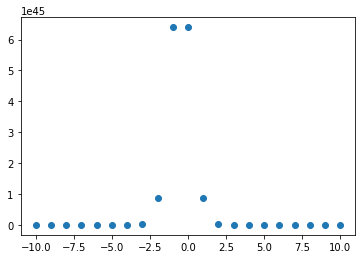

In [ ]:
plt.scatter(range(-10,11),norms)

In [ ]:
def Stochastic_gradient_descent_L1_L2_regularizer(X, Y, theta, alpha, max_iter,lmda):

  costs = []
  m = len(Y)
  print('x: ', X)
  print('y: ', Y)
  
  for i in range(max_iter):
    
    j=np.random.choice(range(m)) 
      
  #print(iteration)
  # Hypothesis Values
    h = X[j].dot(theta)

  # Difference b/w Hypothesis and Actual Y
    loss = h - Y[j]
      # Gradient Calculation

    gradient = (2*X[j].T.dot(loss))/m +  lmda*np.sign(theta) + 2*lmda*theta

  # Changing Values of B using Gradient
    theta = theta - alpha * gradient
  # New Cost Value
    cost = cost_function_l1_l2(X, Y, theta,lmda)
    costs.append(cost)
      # if i % gap == 0 :
    #print ('iteration : ', i, ' loss : ', costs[-1])
  print('Print thetas ', theta)
  return theta, costs

In [ ]:
theta = np.zeros(X_train.shape[1])
alpha = 0.7
max_iter = 4000
lmda=0.00000001
theta,costs = Stochastic_gradient_descent_L1_L2_regularizer(X_train, Y_train, theta, alpha, max_iter,lmda)


x:  [[0.00493022 0.03922825 0.98697568 0.08020342]
 [0.00831732 0.03672432 0.97393195 0.09226693]
 [0.01751781 0.06438401 0.96971991 0.07293426]
 ...
 [0.0028242  0.03752984 0.98817912 0.08103806]
 [0.02673771 0.06780993 0.97467924 0.06094839]
 [0.02514606 0.06502455 0.97727052 0.05765834]]
y:  [484.42 475.14 442.82 ... 490.83 425.71 437.52]
Print thetas  [  6.93960803  21.5313955  432.92417232  30.61856998]


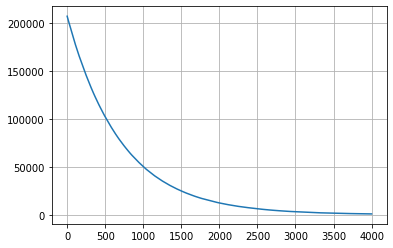

In [ ]:
plt.plot(costs)
plt.grid()

In [ ]:
MSE=cost_function_l2(X_test,Y_test,theta,lmda)
MSE

957.166605434918

#Here we write a function for the norm of the weight of the combinaison of L1 and L2 regularization for Stochastic gradient descent. And we do his plot.

In [ ]:
theta = np.zeros(X_train.shape[1])
alpha = 0.001
max_iter = 1000


In [ ]:
norms = []
for lmda in range(-10, 11):
  theta,_ = Stochastic_gradient_descent_L1_L2_regularizer(X_train, Y_train, theta, alpha, max_iter,lmda)
  norms.append(np.linalg.norm(theta))
  

x:  [[0.00493022 0.03922825 0.98697568 0.08020342]
 [0.00831732 0.03672432 0.97393195 0.09226693]
 [0.01751781 0.06438401 0.96971991 0.07293426]
 ...
 [0.0028242  0.03752984 0.98817912 0.08103806]
 [0.02673771 0.06780993 0.97467924 0.06094839]
 [0.02514606 0.06502455 0.97727052 0.05765834]]
y:  [484.42 475.14 442.82 ... 490.83 425.71 437.52]
Print thetas  [1.95380354e+08 1.95688468e+08 2.04269304e+08 1.95868371e+08]
x:  [[0.00493022 0.03922825 0.98697568 0.08020342]
 [0.00831732 0.03672432 0.97393195 0.09226693]
 [0.01751781 0.06438401 0.96971991 0.07293426]
 ...
 [0.0028242  0.03752984 0.98817912 0.08103806]
 [0.02673771 0.06780993 0.97467924 0.06094839]
 [0.02514606 0.06502455 0.97727052 0.05765834]]
y:  [484.42 475.14 442.82 ... 490.83 425.71 437.52]
Print thetas  [1.09307613e+16 1.09475639e+16 1.14155122e+16 1.09573838e+16]
x:  [[0.00493022 0.03922825 0.98697568 0.08020342]
 [0.00831732 0.03672432 0.97393195 0.09226693]
 [0.01751781 0.06438401 0.96971991 0.07293426]
 ...
 [0.002824

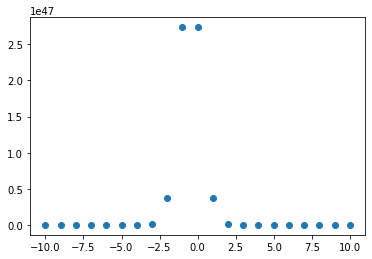

In [ ]:
plt.scatter(range(-10,11),norms)

In [ ]:
def Minibatch_gradient_descent_L1_regularizer(X, Y, theta, alpha,batch_size, max_iter,lmda):
#m, d = X.shape
  costs = []
  m = len(Y)
  print('x: ', X)
  print('y: ', Y)
  
  for i in range(max_iter):
    #if i %100 == 0: print(i)
    for j in range(0, X.shape[0], batch_size):
#print(iteration)
# Hypothesis Values
      h = X[j].dot(theta)

# Difference b/w Hypothesis and Actual Y
      loss = h - Y[j]
      #print('loss: ', loss)
# Gradient Calculation

      gradient = (X[j].T.dot(loss))/batch_size + lmda*np.sign(theta)

# Changing Values of B using Gradient
      theta = theta - alpha * gradient
# New Cost Value
    cost = cost_function_l1(X, Y, theta,lmda)
    costs.append(cost)
      
  print('Print thetas ', theta)
  return theta, costs
  

In [ ]:
theta = np.zeros(X_train.shape[1])
alpha = 0.0005
max_iter = 2000
lmda=0.01
batch_size=16
theta,costs = Minibatch_gradient_descent_L1_regularizer(X_train, Y_train, theta, alpha,batch_size, max_iter,lmda)

x:  [[0.00493022 0.03922825 0.98697568 0.08020342]
 [0.00831732 0.03672432 0.97393195 0.09226693]
 [0.01751781 0.06438401 0.96971991 0.07293426]
 ...
 [0.0028242  0.03752984 0.98817912 0.08103806]
 [0.02673771 0.06780993 0.97467924 0.06094839]
 [0.02514606 0.06502455 0.97727052 0.05765834]]
y:  [484.42 475.14 442.82 ... 490.83 425.71 437.52]
Print thetas  [  5.77034334  21.617585   458.96577007  31.23175946]


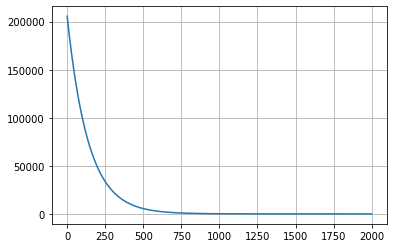

In [ ]:
plt.plot(costs)
plt.grid()

In [ ]:
MSE=cost_function_l1(X_test,Y_test,theta,lmda)
MSE

261.76488941114957

#Here we write a function for the norm of the weight of L1 regularization of Mini batch gradient descent. And we do his plot.

In [ ]:
theta = np.zeros(X_train.shape[1])
alpha = 0.001
max_iter = 100

In [ ]:
norms = []
for lmda in range(-10, 11):
  theta,_ = Minibatch_gradient_descent_L1_regularizer(X_train, Y_train, theta, alpha,batch_size, max_iter,lmda)
  norms.append(np.linalg.norm(theta))
  

x:  [[0.00493022 0.03922825 0.98697568 0.08020342]
 [0.00831732 0.03672432 0.97393195 0.09226693]
 [0.01751781 0.06438401 0.96971991 0.07293426]
 ...
 [0.0028242  0.03752984 0.98817912 0.08103806]
 [0.02673771 0.06780993 0.97467924 0.06094839]
 [0.02514606 0.06502455 0.97727052 0.05765834]]
y:  [484.42 475.14 442.82 ... 490.83 425.71 437.52]
Print thetas  [123.27831321 130.23979731 318.06479046 133.71463332]
x:  [[0.00493022 0.03922825 0.98697568 0.08020342]
 [0.00831732 0.03672432 0.97393195 0.09226693]
 [0.01751781 0.06438401 0.96971991 0.07293426]
 ...
 [0.0028242  0.03752984 0.98817912 0.08103806]
 [0.02673771 0.06780993 0.97467924 0.06094839]
 [0.02514606 0.06502455 0.97727052 0.05765834]]
y:  [484.42 475.14 442.82 ... 490.83 425.71 437.52]
Print thetas  [231.68495636 239.63672793 455.69123587 243.8166832 ]
x:  [[0.00493022 0.03922825 0.98697568 0.08020342]
 [0.00831732 0.03672432 0.97393195 0.09226693]
 [0.01751781 0.06438401 0.96971991 0.07293426]
 ...
 [0.0028242  0.03752984 0.

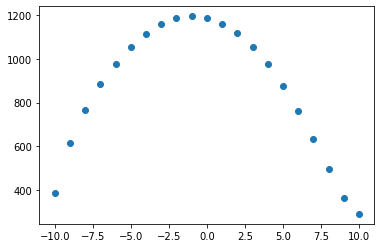

In [ ]:
plt.scatter(range(-10,11),norms)

In [ ]:
def Minibatch_gradient_descent_L2_regularizer(X, Y, theta, alpha,batch_size, max_iter,lmda):
#m, d = X.shape
  costs = []
  m = len(Y)
  print('x: ', X)
  print('y: ', Y)
  
  for i in range(max_iter):
    #if i %100 == 0: print(i)
    for j in range(0, X.shape[0], batch_size):
#print(iteration)
# Hypothesis Values
      h = X[j].dot(theta)

# Difference b/w Hypothesis and Actual Y
      loss = h - Y[j]
      #print('loss: ', loss)
# Gradient Calculation

      gradient = X[j].T.dot(loss)/batch_size + 2*lmda*theta

# Changing Values of B using Gradient
      theta = theta - alpha * gradient
# New Cost Value
    cost = cost_function_l2(X, Y, theta,lmda)
    costs.append(cost)
      
  print('Print thetas ', theta)
  return theta, costs
  

In [ ]:
theta = np.zeros(X_train.shape[1])
alpha = 0.0005
max_iter = 2000
lmda=0.001
batch_size=16
theta,costs = Minibatch_gradient_descent_L2_regularizer(X_train, Y_train, theta, alpha,batch_size, max_iter,lmda)

x:  [[0.00493022 0.03922825 0.98697568 0.08020342]
 [0.00831732 0.03672432 0.97393195 0.09226693]
 [0.01751781 0.06438401 0.96971991 0.07293426]
 ...
 [0.0028242  0.03752984 0.98817912 0.08103806]
 [0.02673771 0.06780993 0.97467924 0.06094839]
 [0.02514606 0.06502455 0.97727052 0.05765834]]
y:  [484.42 475.14 442.82 ... 490.83 425.71 437.52]
Print thetas  [  6.79894581  22.13632471 444.39135144  31.26569195]


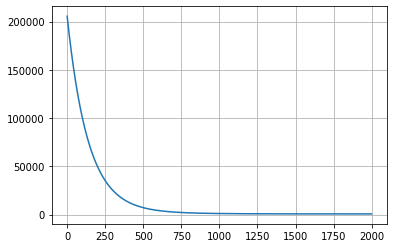

In [ ]:
plt.plot(costs)
plt.grid()

In [ ]:
MSE=cost_function_l2(X_test,Y_test,theta,lmda)
MSE

684.9882574502105

#Here we write a function for the norm of the weight of L2 regularization of Mini batch gradient descent. And we do his plot.

In [ ]:
theta = np.zeros(X_train.shape[1])
alpha = 0.00001
max_iter = 100

In [ ]:
norms = []
for lmda in range(-10, 11):
  theta,_ = Minibatch_gradient_descent_L2_regularizer(X_train, Y_train, theta, alpha,batch_size, max_iter,lmda)
  norms.append(np.linalg.norm(theta))
  

x:  [[0.00493022 0.03922825 0.98697568 0.08020342]
 [0.00831732 0.03672432 0.97393195 0.09226693]
 [0.01751781 0.06438401 0.96971991 0.07293426]
 ...
 [0.0028242  0.03752984 0.98817912 0.08103806]
 [0.02673771 0.06780993 0.97467924 0.06094839]
 [0.02514606 0.06502455 0.97727052 0.05765834]]
y:  [484.42 475.14 442.82 ... 490.83 425.71 437.52]
Print thetas  [ 0.23300169  0.72211125 13.8725413   0.95957806]
x:  [[0.00493022 0.03922825 0.98697568 0.08020342]
 [0.00831732 0.03672432 0.97393195 0.09226693]
 [0.01751781 0.06438401 0.96971991 0.07293426]
 ...
 [0.0028242  0.03752984 0.98817912 0.08103806]
 [0.02673771 0.06780993 0.97467924 0.06094839]
 [0.02514606 0.06502455 0.97727052 0.05765834]]
y:  [484.42 475.14 442.82 ... 490.83 425.71 437.52]
Print thetas  [  2.20330859   6.82878992 131.19506175   9.07507959]
x:  [[0.00493022 0.03922825 0.98697568 0.08020342]
 [0.00831732 0.03672432 0.97393195 0.09226693]
 [0.01751781 0.06438401 0.96971991 0.07293426]
 ...
 [0.0028242  0.03752984 0.9881

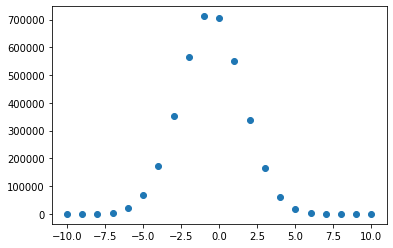

In [ ]:
plt.scatter(range(-10,11),norms)

In [ ]:
def Minibatch_gradient_descent_L1_L2_regularizer(X, Y, theta, alpha,batch_size, max_iter,lmda):
#m, d = X.shape
  costs = []
  m = len(Y)
  print('x: ', X)
  print('y: ', Y)
  
  for i in range(max_iter):
    #if i %100 == 0: print(i)
    for j in range(0, X.shape[0], batch_size):
#print(iteration)
# Hypothesis Values
      h = X[j].dot(theta)

# Difference b/w Hypothesis and Actual Y
      loss = h - Y[j]
      #print('loss: ', loss)
# Gradient Calculation

      gradient = X[j].T.dot(loss)/batch_size + lmda*np.sign(theta) + 2*lmda*theta

# Changing Values of B using Gradient
      theta = theta - alpha * gradient
# New Cost Value
    cost = cost_function_l1_l2(X, Y, theta,lmda)
    costs.append(cost)
      
  print('Print thetas ', theta)
  return theta, costs
  

In [ ]:
theta = np.zeros(X_train.shape[1])
alpha = 0.01
max_iter = 1000
lmda=0.0001
batch_size=32
theta,costs = Minibatch_gradient_descent_L1_L2_regularizer(X_train, Y_train, theta, alpha,batch_size, max_iter,lmda)

x:  [[0.00493022 0.03922825 0.98697568 0.08020342]
 [0.00831732 0.03672432 0.97393195 0.09226693]
 [0.01751781 0.06438401 0.96971991 0.07293426]
 ...
 [0.0028242  0.03752984 0.98817912 0.08103806]
 [0.02673771 0.06780993 0.97467924 0.06094839]
 [0.02514606 0.06502455 0.97727052 0.05765834]]
y:  [484.42 475.14 442.82 ... 490.83 425.71 437.52]
Print thetas  [  5.27844995  19.64163022 459.4279233   33.1926677 ]


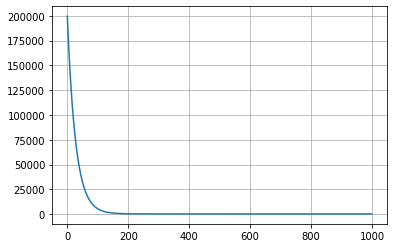

In [ ]:

plt.plot(costs)
plt.grid()

In [ ]:
MSE=cost_function_l1_l2(X_test,Y_test,theta,lmda)
MSE

276.1245970439799

#Here we write a function for the norm of the weight of the combinaison of L1 and L2 regularization for Minibatch gradient descent. And we do his plot.

In [ ]:
theta = np.zeros(X_train.shape[1])
alpha = 0.00001
max_iter = 100

In [ ]:
norms = []
for lmda in range(-10, 11):
  theta,_ = Minibatch_gradient_descent_L1_L2_regularizer(X_train, Y_train, theta, alpha,batch_size, max_iter,lmda)
  
  norms.append(np.linalg.norm(theta))

  

x:  [[0.00493022 0.03922825 0.98697568 0.08020342]
 [0.00831732 0.03672432 0.97393195 0.09226693]
 [0.01751781 0.06438401 0.96971991 0.07293426]
 ...
 [0.0028242  0.03752984 0.98817912 0.08103806]
 [0.02673771 0.06780993 0.97467924 0.06094839]
 [0.02514606 0.06502455 0.97727052 0.05765834]]
y:  [484.42 475.14 442.82 ... 490.83 425.71 437.52]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in add


Print thetas  [nan nan nan nan]
x:  [[0.00493022 0.03922825 0.98697568 0.08020342]
 [0.00831732 0.03672432 0.97393195 0.09226693]
 [0.01751781 0.06438401 0.96971991 0.07293426]
 ...
 [0.0028242  0.03752984 0.98817912 0.08103806]
 [0.02673771 0.06780993 0.97467924 0.06094839]
 [0.02514606 0.06502455 0.97727052 0.05765834]]
y:  [484.42 475.14 442.82 ... 490.83 425.71 437.52]
Print thetas  [nan nan nan nan]
x:  [[0.00493022 0.03922825 0.98697568 0.08020342]
 [0.00831732 0.03672432 0.97393195 0.09226693]
 [0.01751781 0.06438401 0.96971991 0.07293426]
 ...
 [0.0028242  0.03752984 0.98817912 0.08103806]
 [0.02673771 0.06780993 0.97467924 0.06094839]
 [0.02514606 0.06502455 0.97727052 0.05765834]]
y:  [484.42 475.14 442.82 ... 490.83 425.71 437.52]
Print thetas  [nan nan nan nan]
x:  [[0.00493022 0.03922825 0.98697568 0.08020342]
 [0.00831732 0.03672432 0.97393195 0.09226693]
 [0.01751781 0.06438401 0.96971991 0.07293426]
 ...
 [0.0028242  0.03752984 0.98817912 0.08103806]
 [0.02673771 0.0678

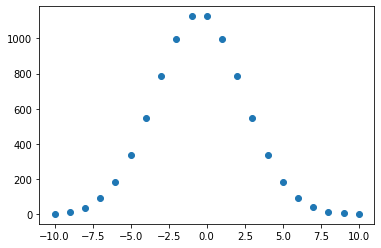

In [ ]:
plt.scatter(range(-10,11),norms)

#Let us print out the weight for the model with the highest norm and lowest norm

In [ ]:
#the highest norm 
theta = np.zeros(X_train.shape[1])
alpha = 0.00001
max_iter = 100
weight,_ = Stochastic_gradient_descent_L1_regularizer(X_train, Y_train, theta, alpha, max_iter,lmda)

x:  [[-0.67524243 -0.59072502  1.74471994 -0.48975375]
 [-0.66689591 -0.59689522  1.7125775  -0.46002678]
 [-0.64422401 -0.52873603  1.70219817 -0.50766647]
 ...
 [-0.68043209 -0.59491024  1.74768547 -0.48769702]
 [-0.62150428 -0.52029385  1.71441899 -0.53720212]
 [-0.62542642 -0.5271576   1.72080444 -0.54530947]]
y:  [484.42 475.14 442.82 ... 490.83 425.71 437.52]
Print thetas  [-7.00920828e-06  3.14690421e-05 -7.88610443e-05  5.31264632e-05]


In [ ]:
#lowest 
theta = np.zeros(X_train.shape[1])
alpha = 0.00001
max_iter = 100
weight,_ = Stochastic_gradient_descent_L1_regularizer(X_train, Y_train, theta, alpha, max_iter,lmda)

#Let us print out the weight of L1 and L2 stochastic gradient descent regularization.

In [ ]:
weight,_ = Stochastic_gradient_descent_L1_regularizer(X_train, Y_train, theta, alpha, max_iter,lmda)

x:  [[-0.67524243 -0.59072502  1.74471994 -0.48975375]
 [-0.66689591 -0.59689522  1.7125775  -0.46002678]
 [-0.64422401 -0.52873603  1.70219817 -0.50766647]
 ...
 [-0.68043209 -0.59491024  1.74768547 -0.48769702]
 [-0.62150428 -0.52029385  1.71441899 -0.53720212]
 [-0.62542642 -0.5271576   1.72080444 -0.54530947]]
y:  [484.42 475.14 442.82 ... 490.83 425.71 437.52]
Print thetas  [-5.83164938e-06 -7.66039874e-05  6.85829178e-06 -6.93433328e-05]


In [ ]:
weight,_ = Stochastic_gradient_descent_L2_regularizer(X_train, Y_train, theta, alpha, max_iter,lmda)

x:  [[-0.67524243 -0.59072502  1.74471994 -0.48975375]
 [-0.66689591 -0.59689522  1.7125775  -0.46002678]
 [-0.64422401 -0.52873603  1.70219817 -0.50766647]
 ...
 [-0.68043209 -0.59491024  1.74768547 -0.48769702]
 [-0.62150428 -0.52029385  1.71441899 -0.53720212]
 [-0.62542642 -0.5271576   1.72080444 -0.54530947]]
y:  [484.42 475.14 442.82 ... 490.83 425.71 437.52]
Print thetas  [-0.01539641 -0.01344632  0.04110994 -0.01228791]


#STEP 4


#J)


In [ ]:
def Minibatch_gradient_descent(X, Y, theta, alpha,batch_size, max_iter):
#m, d = X.shape
  costs = []
  m = len(Y)
  #print('x: ', X)
  #print('y: ', Y)
  
  for i in range(max_iter):
    #if i %100 == 0: print(i)
    for j in range(0, X.shape[0], batch_size):
#print(iteration)
# Hypothesis Values
      h = X[j].dot(theta)

# Difference b/w Hypothesis and Actual Y
      loss = h - Y[j]
      #print('loss: ', loss)
# Gradient Calculation

      gradient = X[j].T.dot(loss)/batch_size

# Changing Values of B using Gradient
      theta = theta - alpha * gradient
# New Cost Value
    cost = cost_function(X, Y, theta)
    costs.append(cost)
  #print (' MSE: ', costs)    
  
  return theta, costs


In [ ]:
theta = np.zeros(X_train.shape[1])
alpha = 0.7
max_iter = 1000
batch_size=16
MSE_train = Minibatch_gradient_descent(X_train, Y_train, theta, alpha,batch_size, max_iter)[1]
MSE_train 



[281.39743683257547,
 259.0651655380298,
 258.42355210223644,
 257.8689608986995,
 257.31641480225284,
 256.76544230105276,
 256.216036111155,
 255.66819151881998,
 255.12190383884587,
 254.57716840052493,
 254.03398054752546,
 253.49233563784136,
 252.95222904375498,
 252.41365615178498,
 251.8766123626495,
 251.34109309121408,
 250.80709376645427,
 250.27460983140602,
 249.74363674312812,
 249.21416997265237,
 248.6862050049443,
 248.15973733885681,
 247.63476248708812,
 247.11127597614185,
 246.5892733462777,
 246.06875015147315,
 245.54970195937943,
 245.0321243512777,
 244.5160129220404,
 244.00136328008344,
 243.48817104732944,
 242.97643185915945,
 242.46614136438004,
 241.95729522517115,
 241.4498891170523,
 240.94391872883688,
 240.4393797625921,
 239.93626793359854,
 239.43457897030544,
 238.93430861429636,
 238.43545262024094,
 237.93800675585913,
 237.44196680187792,
 236.94732855199078,
 236.45408781282143,
 235.9622404038784,
 235.47178215751586,
 234.98270891889533,
 234

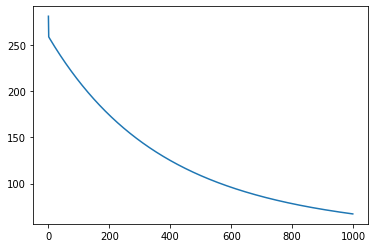

In [ ]:
plt.plot(MSE_train)

In [ ]:
theta = np.zeros(X_train.shape[1])
alpha = 0.7
max_iter = 1000
batch_size=16
MSE_test = Minibatch_gradient_descent(X_test, Y_test, theta, alpha,batch_size, max_iter)[1]
MSE_test




[257.1086742708837,
 255.06423875152657,
 253.0414769401893,
 251.04014633122028,
 249.06000577162686,
 247.1008169000284,
 245.16234411390306,
 243.2443545372267,
 241.34661798849024,
 239.468906949097,
 237.61099653213026,
 235.77266445149013,
 233.95369099139862,
 232.15385897625833,
 230.3729537408717,
 228.61076310101063,
 226.86707732433007,
 225.1416891016319,
 223.43439351845868,
 221.74498802703224,
 220.07327241851576,
 218.41904879560707,
 216.7821215454541,
 215.1622973128905,
 213.55938497398634,
 211.9731956099095,
 210.4035424811006,
 208.850241001746,
 207.3131087145557,
 205.79196526583823,
 204.28663238087006,
 202.79693383955163,
 201.32269545235744,
 199.863745036563,
 198.4199123927564,
 196.99102928162554,
 195.57692940101833,
 194.17744836327387,
 192.79242367282265,
 191.42169470404733,
 190.0651026794079,
 188.72249064782307,
 187.39370346330705,
 186.07858776385658,
 184.77699195059031,
 183.48876616712977,
 182.21376227922798,
 180.95183385463272,
 179.702836

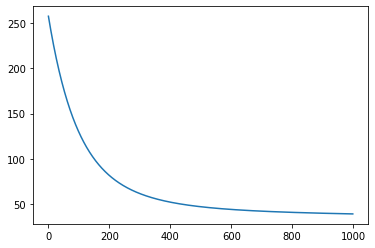

In [ ]:
plt.plot(MSE_test)

# K)
Here we will more features in our data

In [ ]:
#i)
square = lambda x: x **2 
features=data.drop('PE',axis=1)
data2 = features.apply(square)
data2.columns=['square_AT','square_V','square_AP','square_RH']

In [ ]:
data2.head(2)

,square_AT,square_V,square_AP,square_RH
0,223.8016,1743.8976,1.048719e+06,5353.8489
1,634.0324,3963.9616,1.040482e+06,3490.4464


In [ ]:
X_poly2=pd.concat([data2,data],axis=1)

In [ ]:
X_poly2

,square_AT,square_V,square_AP,square_RH,AT,V,AP,RH,PE
0,223.8016,1743.8976,1.048719e+06,5353.8489,14.96,41.76,1024.07,73.17,463.26
1,634.0324,3963.9616,1.040482e+06,3490.4464,25.18,62.96,1020.04,59.08,444.37
2,26.1121,1552.3600,1.024468e+06,8489.7796,5.11,39.40,1012.16,92.14,488.56
3,435.1396,3285.5824,1.020585e+06,5873.6896,20.86,57.32,1010.24,76.64,446.48
4,117.0724,1406.2500,1.018545e+06,9335.4244,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...,...,...,...,...
9563,277.2225,2469.0961,1.028216e+06,8281.0000,16.65,49.69,1014.01,91.00,460.03
9564,173.9761,1535.0724,1.047900e+06,4459.5684,13.19,39.18,1023.67,66.78,469.62
9565,980.9424,5524.9489,1.026007e+06,1330.7904,31.32,74.33,1012.92,36.48,429.57
9566,599.2704,4823.3025,1.027912e+06,3892.5121,24.48,69.45,1013.86,62.39,435.74


In [ ]:
#ii)
triple = lambda x: x **3
features=data.drop('PE',axis=1)
data3 = features.apply(triple)
data3.columns=['triple_AT','triple_V','triple_AP','triple_RH']

In [ ]:
data3.head(2)

,triple_AT,triple_V,triple_AP,triple_RH
0,3348.071936,72825.163776,1.073962e+09,391741.124013
1,15964.935832,249571.022336,1.061333e+09,206215.573312


In [ ]:
X_poly2_3=pd.concat([data3,data],axis=1)

In [ ]:
X_poly2_3.head(2)

,triple_AT,triple_V,triple_AP,triple_RH,AT,V,AP,RH,PE
0,3348.071936,72825.163776,1.073962e+09,391741.124013,14.96,41.76,1024.07,73.17,463.26
1,15964.935832,249571.022336,1.061333e+09,206215.573312,25.18,62.96,1020.04,59.08,444.37


In [ ]:
four = lambda x: x **3
features=data.drop('PE',axis=1)
data4 = features.apply(triple)
data4.columns=['four_AT','four_V','four_AP','four_RH']

In [ ]:
data4.head(2)

,four_AT,four_V,four_AP,four_RH
0,3348.071936,72825.163776,1.073962e+09,391741.124013
1,15964.935832,249571.022336,1.061333e+09,206215.573312


In [ ]:
X_poly2_3_4=pd.concat([data4,data],axis=1)
X_poly2_3_4

,four_AT,four_V,four_AP,four_RH,AT,V,AP,RH,PE
0,3348.071936,72825.163776,1.073962e+09,391741.124013,14.96,41.76,1024.07,73.17,463.26
1,15964.935832,249571.022336,1.061333e+09,206215.573312,25.18,62.96,1020.04,59.08,444.37
2,133.432831,61162.984000,1.036925e+09,782248.292344,5.11,39.40,1012.16,92.14,488.56
3,9077.012056,188329.583168,1.031036e+09,450159.570944,20.86,57.32,1010.24,76.64,446.48
4,1266.723368,52734.375000,1.027946e+09,901988.705528,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...,...,...,...,...
9563,4615.754625,122689.385209,1.042622e+09,753571.000000,16.65,49.69,1014.01,91.00,460.03
9564,2294.744759,60144.136632,1.072704e+09,297809.977752,13.19,39.18,1023.67,66.78,469.62
9565,30723.115968,410669.451737,1.039263e+09,48547.233792,31.32,74.33,1012.92,36.48,429.57
9566,14670.139392,334978.358625,1.042159e+09,242853.829919,24.48,69.45,1013.86,62.39,435.74


In [ ]:
#iV)
def split_Data(df, split_percent=0.2):
      index = np.random.RandomState(seed=4).permutation(df.shape[0])
      n = int(split_percent*df.shape[0]) # r=>range of the split
      X_train = df.iloc[index[:n],:-1]
      X_test = df.iloc[index[n:],:-1]
      Y_train = df.iloc[index[:n],-1]
      Y_test = df.iloc[index[n:],-1]
   
      return X_train.to_numpy(), X_test.to_numpy(), Y_train.to_numpy(), Y_test.to_numpy()

In [ ]:
X_train, X_test, Y_train, Y_test = split_Data(X_poly2)
# normalize features
X_train = (X_train - X_train.min()) / (X_train.max()-X_train.min())
X_test = (X_test - X_test.min()) / (X_test.max()-X_test.min())


In [ ]:
theta = np.zeros(X_train.shape[1])
alpha = 0.9
max_iter = 2000
batch_size=16
MSE_train = Minibatch_gradient_descent(X_train, Y_train, theta, alpha,batch_size, max_iter)[1]
MSE_train

[237.51622208357293,
 231.9256326772558,
 231.91107932954267,
 231.9047577548946,
 231.8984499408596,
 231.89214244572932,
 231.88583524750146,
 231.87952834612167,
 231.8732217415753,
 231.8669154338461,
 231.8606094229195,
 231.85430370877754,
 231.84799829140582,
 231.8416931707897,
 231.8353883469108,
 231.8290838197556,
 231.8227795893072,
 231.81647565554945,
 231.81017201846842,
 231.80386867804535,
 231.7975656342674,
 231.7912628871182,
 231.7849604365807,
 231.77865828263995,
 231.77235642527953,
 231.76605486448497,
 231.7597536002391,
 231.75345263252802,
 231.74715196133414,
 231.74085158664278,
 231.73455150843733,
 231.72825172670255,
 231.7219522414226,
 231.71565305258213,
 231.70935416016457,
 231.70305556415389,
 231.6967572645365,
 231.69045926129442,
 231.68416155441295,
 231.6778641438757,
 231.67156702966795,
 231.66527021177282,
 231.65897369017506,
 231.6526774648588,
 231.64638153580833,
 231.6400859030082,
 231.63379056644277,
 231.6274955260951,
 231.6212007

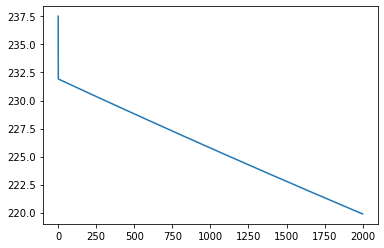

In [ ]:
import matplotlib.pyplot as plt
plt.plot(MSE_train)

In [ ]:
theta = np.zeros(X_train.shape[1])
alpha = 0.9
max_iter = 2000
batch_size=4
MSE_test = Minibatch_gradient_descent(X_test, Y_test, theta, alpha,batch_size, max_iter)[1]
MSE_test

[249.4770525044319,
 249.00453298252702,
 248.53346543225396,
 248.06384498699663,
 247.59566679700296,
 247.12892602933024,
 246.66361786778134,
 246.19973751285065,
 245.73728018166156,
 245.27624110791277,
 244.81661554181335,
 244.3583987500334,
 243.90158601563937,
 243.44617263803895,
 242.99215393292607,
 242.53952523222048,
 242.0882818840125,
 241.63841925250432,
 241.18993271795836,
 240.7428176766366,
 240.29706954074422,
 239.85268373837687,
 239.40965571346337,
 238.9679809257097,
 238.5276548505445,
 238.0886729790643,
 237.65103081797727,
 237.21472388954896,
 236.77974773154892,
 236.34609789719585,
 235.91376995510186,
 235.48275948922097,
 235.05306209879345,
 234.6246733982946,
 234.19758901737754,
 233.7718046008243,
 233.34731580848893,
 232.92411831524782,
 232.50220781094623,
 232.0815800003448,
 231.66223060306643,
 231.24415535354802,
 230.82735000098597,
 230.4118103092825,
 229.997532057,
 229.58451103730218,
 229.17274305790792,
 228.76222394104158,
 228.352

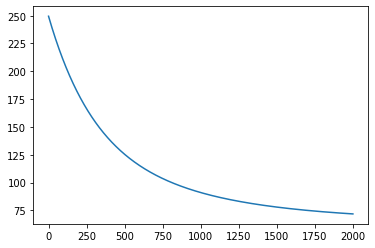

In [ ]:
plt.plot(MSE_test)

#Step 5

In [ ]:
def cross_validation(X,Y,k):
  folds = []
  for i in range(k):
    set_size = len(X)//k
    # test set
    test_start_idx = i*set_size
    test_end_idx = test_start_idx + set_size
    X_testset = X[test_start_idx:test_end_idx, :]
    Y_testset = Y[test_start_idx:test_end_idx, :]
    #train
    X_trainset = np.concatenate([X[0:test_start_idx], X[test_end_idx:]], axis=0)
    Y_trainset = np.concatenate([Y[0:test_start_idx], Y[test_end_idx:]], axis=0)
    folds.append((X_trainset, Y_trainset, X_testset, Y_testset))
  return folds
  #yield to read
    



In [ ]:
#np.mean(error)=cross_valid(data,X,Y,model,k=10)

In [ ]:
len(data)

9568

In [ ]:
k=10
X=data.drop('PE',axis=1).values
Y=data['PE'].values.reshape(-1,1)

In [ ]:
folds=cross_validation(X,Y,k)

In [ ]:
#theta = np.zeros(X_train.shape[1])

In [ ]:
mse = []
initial_theta = np.random.rand(4, 1)
print(initial_theta.shape)
for X_trainset, Y_trainset, X_testset, Y_testset in folds:
  theta, _ = gradient_descent(X_trainset, Y_trainset, initial_theta, 0.01, 100)
  _, cost = gradient_descent(X_testset, Y_testset, theta, 0.01, 1)
  mse.append(cost[-1])
np.mean(mse)

(4, 1)
x:  [[  28.32   47.93 1003.26   54.5 ]
 [  16.71   40.56 1019.48   49.88]
 [  30.7    71.58 1010.     48.96]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]
y:  [[439.5 ]
 [467.46]
 [429.27]
 ...
 [429.57]
 [435.74]
 [453.28]]
Print thetas  [[nan]
 [nan]
 [nan]
 [nan]]
x:  [[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [   7.36   40.07 1017.29   52.55]
 [  28.08   73.42 1012.17   62.74]
 [  24.74   69.13 1010.69   90.08]]
y:  [[463.26]
 [444.37]
 [488.56]
 [446.48]
 [473.9 ]
 [443.67]
 [467.35]
 [478.42]
 [475.98]
 [477.5 ]
 [453.02]
 [453.99]
 [440.29]
 [451.28]
 [433.99]
 [462.19]
 [467.54]
 [477.2 ]
 [459.85]
 [464.3 ]
 [468.27]
 [495.24]
 [483.8 ]
 [443.61]
 [436.06]
 [443.25]
 [464.16]
 [475.52]
 [484.41]
 [437.89]
 [445.11]
 [438.86]
 [440.98]
 [436.65]
 [444.26]
 [465.86]
 [444.37]
 [450.69]
 [469.02]
 [448.86]
 [447.14]
 [469.18]
 [482.8 ]
 [476.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in subtract


[[458.75]
 [466.02]
 [465.69]
 [435.66]
 [445.86]
 [443.91]
 [434.01]
 [444.35]
 [430.45]
 [441.54]
 [429.85]
 [427.91]
 [477.82]
 [464.57]
 [433.11]
 [441.15]
 [442.92]
 [467.5 ]
 [440.36]
 [494.61]
 [470.87]
 [472.95]
 [467.25]
 [452.57]
 [440.06]
 [448.42]
 [467.99]
 [454.35]
 [443.62]
 [487.83]
 [461.81]
 [466.38]
 [462.32]
 [459.04]
 [437.81]
 [435.61]
 [467.59]
 [432.19]
 [449.63]
 [474.4 ]
 [471.62]
 [453.47]
 [463.89]
 [445.93]
 [451.62]
 [446.44]
 [464.14]
 [454.45]
 [462.59]
 [466.22]
 [437.67]
 [470.04]
 [470.42]
 [485.58]
 [431.23]
 [451.44]
 [475.61]
 [451.87]
 [435.57]
 [479.24]
 [479.58]
 [431.1 ]
 [466.77]
 [448.89]
 [444.38]
 [431.64]
 [437.78]
 [450.73]
 [440.74]
 [451.66]
 [437.01]
 [442.18]
 [471.43]
 [437.51]
 [475.63]
 [448.22]
 [481.73]
 [429.91]
 [460.48]
 [459.01]
 [474.87]
 [451.08]
 [474.57]
 [450.23]
 [443.93]
 [435.64]
 [468.64]
 [458.62]
 [465.64]
 [465.25]
 [451.95]
 [477.94]
 [439.11]
 [451.62]
 [451.33]
 [476.41]
 [437.51]
 [437.93]
 [432.76]
 [443.66]


nan